# Wine Data Analysis

Let's analyze the **Wine Quality Dataset** which can be found in the [UCI repository](https://archive.ics.uci.edu/ml/datasets/wine+quality).

**Description**:

    The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
    
So let's import the dataset.

## Dependencies

In [198]:
import os
import sys
path = os.getcwd().split('tests')[0]
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set_style('darkgrid')



In [199]:
df = pd.read_csv(path+'data/raw/winequality-white.csv',sep=';')

In [200]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### How many samples and how many attributes?

In [201]:
print("Samples: {}".format(df.shape[0]))
print("Attributes: {}".format(df.shape[1]))

Samples: 4898
Attributes: 12


Now let's get some **info** and **description** of the data.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Cool! There are no **Null Values** and all the attributes are decimal data points, which means that we will only make numeric analysis.

### There are Null Values? Let's confirm!

In [203]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Cool! There are no **null data points**

In [204]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [205]:
df.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

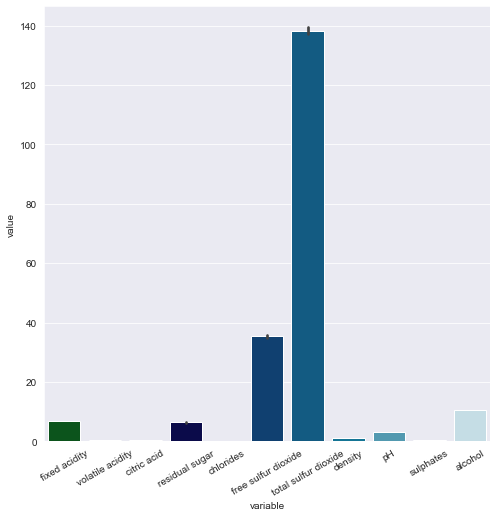

In [206]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x='variable',y='value',data=pd.melt(df[df.columns.values[:-1]]), palette='ocean')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

It's clear that we have a discrepance in the values per columns. But before we analyze the outliers, we will see if there are duplicated values.

### There are duplicated values?

In [207]:
duplicates = df.duplicated()
duplicates.value_counts()

False    3961
True      937
dtype: int64

In [208]:
duplicates.value_counts()*100/df.shape[0]

False    80.869743
True     19.130257
dtype: float64

So we have **80.87%** of the data not duplicated, but **19.13%** are duplicated.

Let's visualize the duplicated data per label.

In [209]:
repeated=df.loc[df.duplicated()==True,'quality'].value_counts()
normal = df['quality'].value_counts()
print(repeated)
print("\n")
print(normal)

6    410
5    282
7    191
8     44
4     10
Name: quality, dtype: int64


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


Let's analyze a barplot of the difference between the total samples and the repeated samples per label, and if there are a small difference, then indicates that a label can have only duplicated samples, so we can drop them.

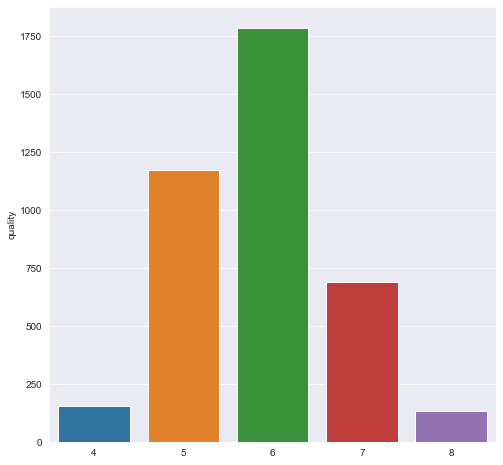

In [210]:
plt.figure(figsize=(8,8))
sns.barplot(x=repeated.index, y=normal[:5]-repeated)

In [211]:
normal[:5]-repeated

6    1788
5    1175
7     689
8     131
4     153
Name: quality, dtype: int64

In [212]:
(normal[:5]-repeated)*100/normal[:5]

6    81.346679
5    80.645161
7    78.295455
8    74.857143
4    93.865031
Name: quality, dtype: float64

In [213]:
repeated*100/normal[:5]

6    18.653321
5    19.354839
7    21.704545
8    25.142857
4     6.134969
Name: quality, dtype: float64

There are a lot of data points left per label, so we can't drop the label.
So we will only drop the duplicated data and keep the first ones.

In [214]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
5,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6
6,8.1,0.270,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.000000,5
7,8.6,0.230,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.700000,5
8,7.9,0.180,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.800000,5
9,6.6,0.160,0.40,1.50,0.044,48.0,143.0,0.99120,3.54,0.52,12.400000,7


Okay! Now we will transform the `quality` values, so we will get the original nominal values and then we will transform it.

In [215]:
df.quality.value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [216]:
df['quality'].replace({3:1,4:2,5:3,6:4,7:5,8:6,9:7},inplace=True)

In [217]:
df['quality'].value_counts()

4    1788
3    1175
5     689
2     153
6     131
1      20
7       5
Name: quality, dtype: int64

Now let's analyze the data distribution.

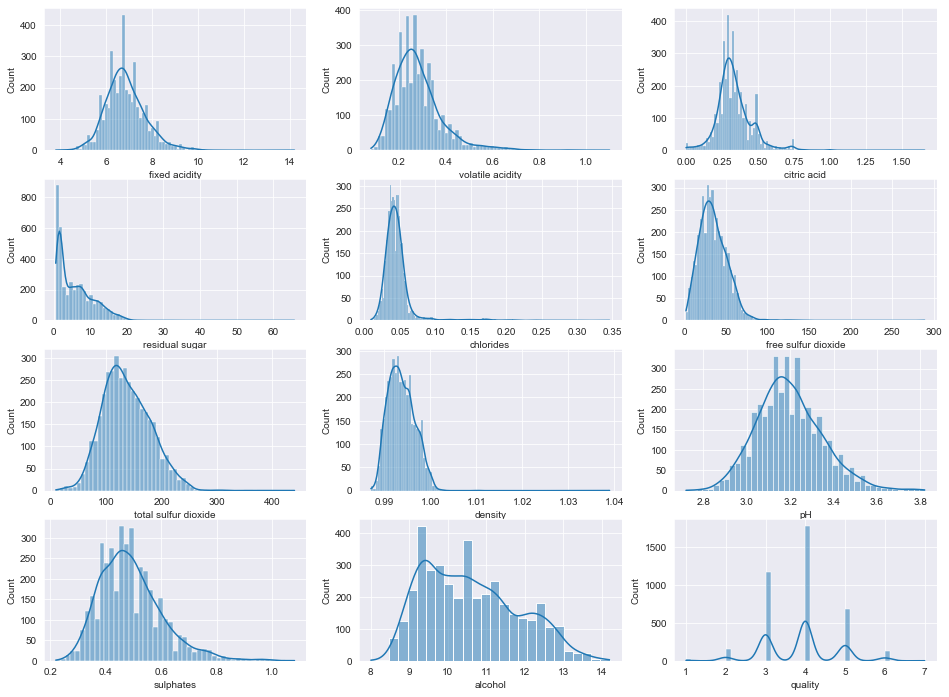

In [218]:
fig, axes = plt.subplots(4,3,figsize=(16,12))
for i in range(12):
    
    if i <12:
        r = int(i/3)
        c = int(i - 3*r)
        g = sns.histplot(data=df, x=df.columns.values[i], kde=True,ax=axes[r,c])
#       g.set_xlabel('')
#       g.set_ylabel('')

In [219]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

We will analyze how shifted to left or right the data distribution are. Visualy we can see that the attribute that is closest to a normal distribution is the `pH`, but we will confirm numerically by calculating the assymmetry (**skewness**) and the pointness (**kurtosis**).

In [220]:
skew = df.skew()

In [221]:
# Right shifted
skew.loc[skew>1].sort_values(ascending=False)

chlorides              4.969076
volatile acidity       1.641081
free sulfur dioxide    1.566680
residual sugar         1.333639
citric acid            1.310601
density                1.273318
dtype: float64

In [222]:
# Left shifted
skew.loc[skew<-1].sort_values()

Series([], dtype: float64)

In [223]:
kurt = df.kurtosis()
kurt.sort_values(ascending=False)

chlorides               35.530288
density                 14.184892
free sulfur dioxide     13.434025
citric acid              6.844808
residual sugar           5.681512
volatile acidity         5.327754
fixed acidity            2.253047
sulphates                1.565021
total sulfur dioxide     0.735258
pH                       0.549957
quality                  0.299345
alcohol                 -0.695980
dtype: float64

Okay, there are only right shifted data and the `chlorides` has the highest skewness, which probably indicates a great amont of outliers. Also we have a high value in `chlorides` for the kurtosis, which means is very pointy, while we have as the smallest value, the `pH`. Let's see the outliers by making a boxplot.

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, crest, crest_r, cubehelix, cubehelix_r, flag, flag_r, flare, flare_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

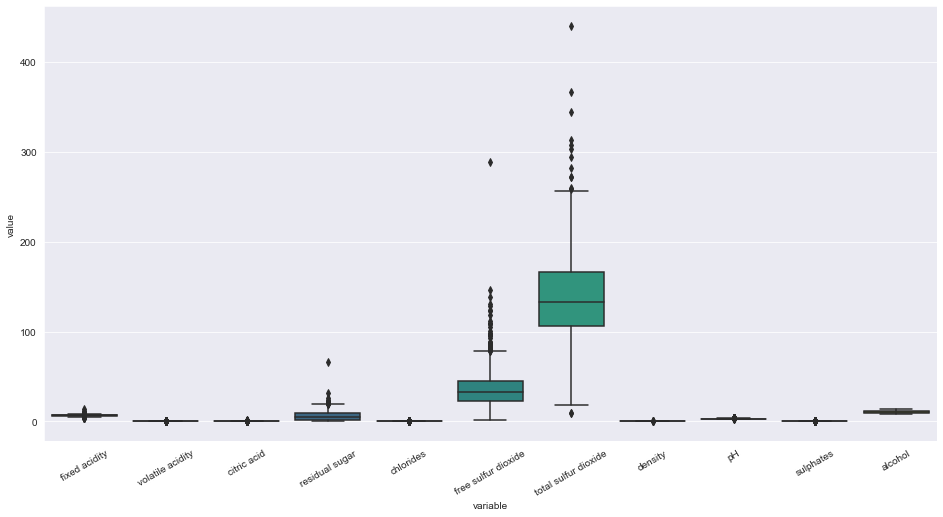

In [224]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x='variable',y='value',data=pd.melt(df[df.columns.values[:-1]]), palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);

Let's s scale the data and better see the outliers.

In [225]:
df_scale = (df[df.columns.values[:-1]] - df[df.columns.values[:-1]].mean())/df[df.columns.values[:-1]].std()
df_scale = pd.concat([df_scale,df['quality']],axis=1)
df_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.185329,-0.101876,0.209625,3.041188,-0.039176,0.587497,0.760658,2.482435,-1.289765,-0.355443,-1.470210,4
1,-0.622184,0.188156,0.046288,-0.887522,0.133964,-1.213779,-0.120418,0.072461,0.689837,-0.003091,-0.895061,4
2,1.454277,-0.005199,0.536299,0.202643,0.177249,-0.284089,-0.931936,0.451171,0.425890,-0.443531,-0.402077,4
3,0.416046,-0.488584,-0.117049,0.531750,0.523528,0.703708,1.131638,0.623312,-0.036017,-0.795883,-0.566405,4
4,-0.737543,0.381510,-1.423747,0.223213,-0.039176,-0.284089,-0.027673,0.382315,-0.102004,-0.179267,-0.812897,4


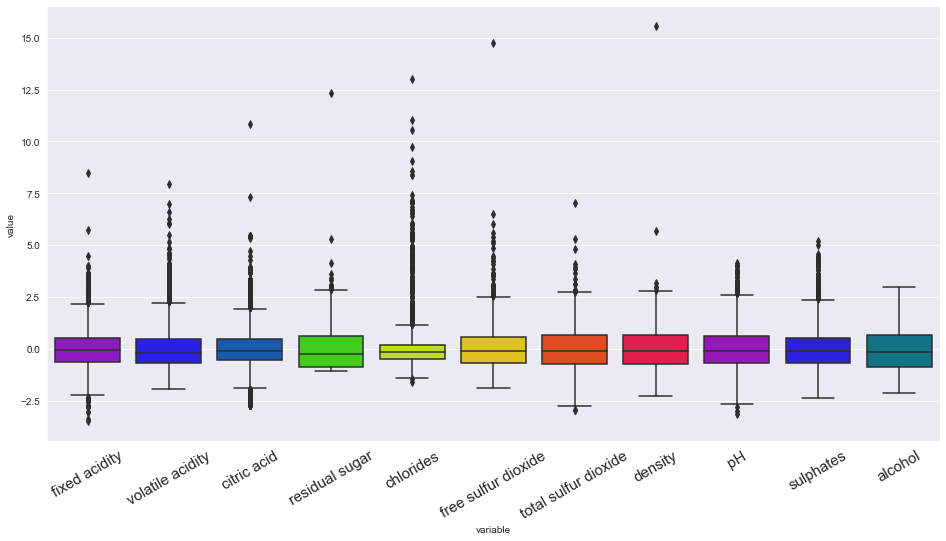

In [226]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x='variable',y='value',data=pd.melt(df_scale[df.columns.values[:-1]]),palette='prism')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,size=15);
#ax.set_yticklabels(ax.get_yticklabels(),size=15);

We can see that almost all the attributes has outliers, except the `alcohol` column. However they are **univariate outliers**, we must find those that are **multivariate**. To find these multivariate outliers we could calculate the euclidean distance, however imagine that are two situations, one that the data it's equally spread in all directions, and the other the data are likely to be spread in some direction than others.
So if we measure the distance between the same data point and the mean in both situations, the distance is obviously the same, but the situation is different, in the first case, the data point is not an outlier, however if one of the directions is shrinked, then this data point become an outlier. This distribution difference is due to the covariance. So the distance that transform the data and eliminates the covariance influence is the `Mahalanobis distance`.

In [227]:
import scipy as sp

def mahalanobis(x):
    
    """ Compute Mahalanobis Distance"""

    x_diff = x - x.mean()
    x_cov = x.cov().values
    
    try:
        chelo = np.linalg.cholesky(x_cov)
    except:
        print("Covariance isn't symmetric or positive definite")

    x_inv_cov = sp.linalg.inv(x_cov)
    
    left_term = x_diff.values@x_inv_cov
    mahal = left_term@x_diff.values.T
    return pd.DataFrame(mahal.diagonal(),columns=['mahalanobis'])

mahal = mahalanobis(df[df.columns.values[:-1]])
mahal

,mahalanobis
0,10.971691
1,6.279950
2,8.063150
3,3.271996
4,3.680563
5,8.117289
6,7.709424
7,8.378275
8,7.977447
9,11.060892


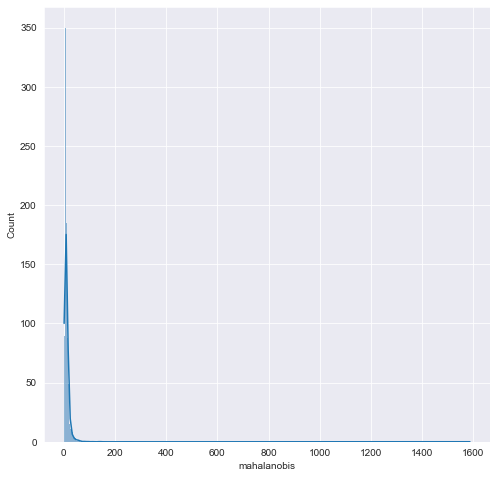

In [228]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.histplot(data=mahal,x='mahalanobis',kde=True,ax=ax)


The `mahalanobis` distances shows a chi-square distribution, so we will test the the hypothesis to find the outliers. For that we will test our hypothesis with .05% and the degree of freedom set by: Df = Vairables - 1, so:

In [229]:
deg = df.shape[1]-1
deg

11

In [230]:
value = sp.stats.chi2.ppf((1-0.05),df=deg)
value

19.67513757268249

In [231]:
mahal[mahal['mahalanobis'] > value]

,mahalanobis
13,28.471452
18,23.478684
26,21.512605
34,36.838063
35,37.594096
47,27.043740
82,23.162838
84,26.022728
96,22.842039
125,21.180420


Now, let's drop the outliers.

In [232]:
indexes = mahal[mahal['mahalanobis']>value].index
indexes = list(indexes)
indexes

[13,
 18,
 26,
 34,
 35,
 47,
 82,
 84,
 96,
 125,
 142,
 151,
 166,
 167,
 168,
 177,
 178,
 194,
 206,
 212,
 248,
 267,
 274,
 275,
 316,
 333,
 359,
 390,
 403,
 425,
 446,
 452,
 503,
 523,
 541,
 551,
 554,
 570,
 572,
 576,
 615,
 628,
 638,
 639,
 640,
 643,
 646,
 650,
 651,
 654,
 689,
 697,
 712,
 717,
 727,
 729,
 734,
 764,
 766,
 776,
 795,
 797,
 822,
 823,
 847,
 854,
 856,
 862,
 865,
 871,
 873,
 877,
 888,
 890,
 930,
 941,
 953,
 977,
 982,
 991,
 998,
 1025,
 1028,
 1030,
 1036,
 1046,
 1051,
 1060,
 1061,
 1068,
 1076,
 1091,
 1092,
 1101,
 1117,
 1159,
 1162,
 1174,
 1175,
 1185,
 1191,
 1199,
 1200,
 1205,
 1215,
 1230,
 1233,
 1237,
 1244,
 1249,
 1253,
 1262,
 1270,
 1289,
 1295,
 1297,
 1300,
 1308,
 1328,
 1330,
 1331,
 1333,
 1340,
 1346,
 1347,
 1348,
 1382,
 1390,
 1392,
 1394,
 1420,
 1424,
 1455,
 1456,
 1460,
 1463,
 1475,
 1487,
 1488,
 1501,
 1505,
 1524,
 1527,
 1534,
 1545,
 1555,
 1562,
 1567,
 1570,
 1586,
 1597,
 1616,
 1617,
 1622,
 1623,
 1631

In [233]:
df = df.drop(index=indexes)

In [234]:
df = df.reset_index(drop=True)

Let's check the distribution!

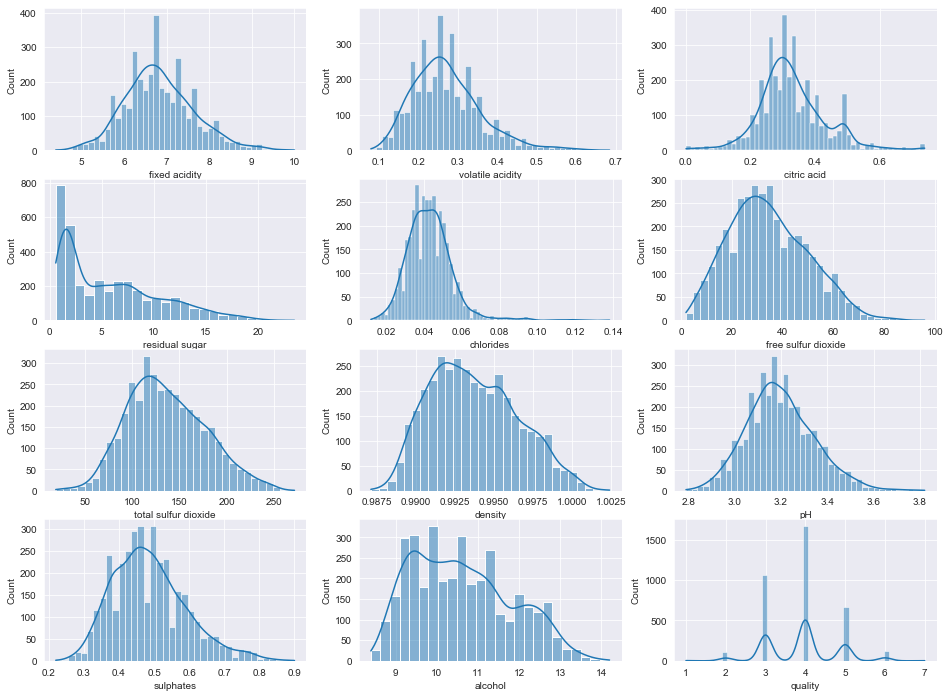

In [235]:
fig, ax = plt.subplots(4,3,figsize=(16,12))
for i in range(12):
    r = int(i/3)
    c = int(i - 3*r)
    sns.histplot(data=df, x=df.columns.values[i],kde=True,ax=ax[r,c])

 It looks like we have normally distributed data, except for the `residual sugar` bu let's see the skewness.

In [236]:
skew = df.skew()
skew.loc[skew>1].sort_values(ascending=True)

chlorides    1.632441
dtype: float64

In [237]:
skew.loc[skew<-1].sort_values()

Series([], dtype: float64)

Cool! Dropping the outliers reduced a lot the skewness of the data. Let's see the kurtosis.

In [238]:
kurt = pd.DataFrame([df.kurt()],columns=df.columns.values)
kurt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.346889,1.183511,1.745737,-0.158686,7.321181,-0.230272,-0.263301,-0.616255,0.349155,0.329328,-0.738001,0.203509


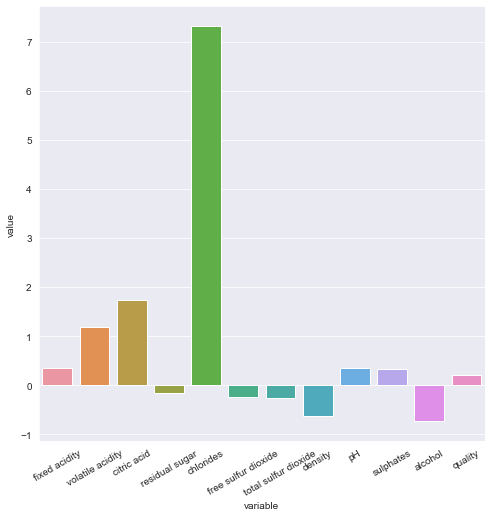

In [239]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data=pd.melt(kurt),x='variable',y='value')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

This indicates that the `chlorides` are pontier than the others variables. Because exceeds the values of 3.

Now let's see our correlation heatmap.

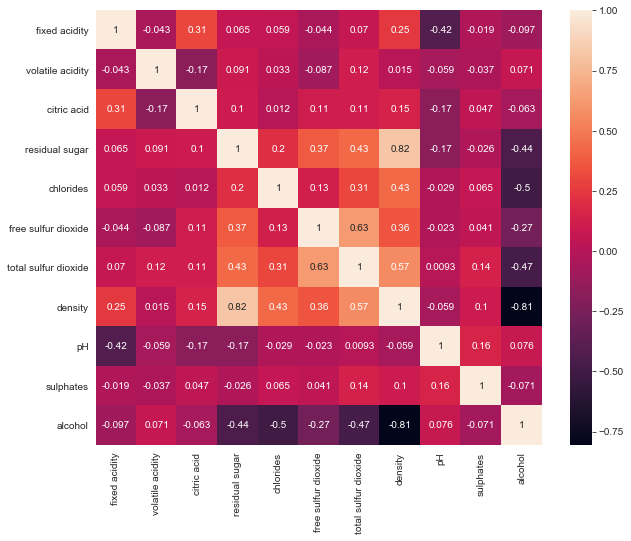

In [240]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df[df.columns.values[:-1]].corr(),annot=True)
ax.set_ylim([11,0]);

In [241]:
df_corr = pd.melt(df.corr())
df_corr['var'] = pd.concat([pd.DataFrame(df.columns.values,columns=['var'])]*df.shape[1], ignore_index=True)
df_corr.head()

,variable,value,var
0,fixed acidity,1.000000,fixed acidity
1,fixed acidity,-0.042563,volatile acidity
2,fixed acidity,0.306751,citric acid
3,fixed acidity,0.065407,residual sugar
4,fixed acidity,0.058802,chlorides


In [242]:
df_corr.drop(index=df_corr.loc[df_corr['value']==1].index, inplace=True)
df_corr.reset_index(drop=True).head()

,variable,value,var
0,fixed acidity,-0.042563,volatile acidity
1,fixed acidity,0.306751,citric acid
2,fixed acidity,0.065407,residual sugar
3,fixed acidity,0.058802,chlorides
4,fixed acidity,-0.044224,free sulfur dioxide


In [243]:
df_corr.sort_values(by='value',ascending=False).head(10)

,variable,value,var
43,residual sugar,0.819718,density
87,density,0.819718,residual sugar
77,total sulfur dioxide,0.629995,free sulfur dioxide
66,free sulfur dioxide,0.629995,total sulfur dioxide
90,density,0.568758,total sulfur dioxide
79,total sulfur dioxide,0.568758,density
142,quality,0.464183,alcohol
131,alcohol,0.464183,quality
42,residual sugar,0.432456,total sulfur dioxide
75,total sulfur dioxide,0.432456,residual sugar


In [244]:
df_corr.sort_values(by='value',ascending=False).tail(10)

,variable,value,var
96,pH,-0.420431,fixed acidity
8,fixed acidity,-0.420431,pH
123,alcohol,-0.441985,residual sugar
46,residual sugar,-0.441985,alcohol
82,total sulfur dioxide,-0.472943,alcohol
126,alcohol,-0.472943,total sulfur dioxide
124,alcohol,-0.496694,chlorides
58,chlorides,-0.496694,alcohol
94,density,-0.806729,alcohol
127,alcohol,-0.806729,density


So the highest variables correlation are the `density` with `residual sugar` with 0.82 in correlation, and the lowest is the `density` variable with `alcohol` with -0.81 in correlation.

Let's get make the principal component analysis and check the variance accumulation.

In [245]:
df_scale = (df[df.columns.values[:-1]] - df[df.columns.values[:-1]].mean())/df[df.columns.values[:-1]].std()

In [246]:
pca = PCA()

In [247]:
x = pca.fit_transform(df_scale)

In [248]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
cum_sum = pd.DataFrame(cum_sum,columns=['Var'])
cum_sum

,Var
0,0.309951
1,0.455562
2,0.566231
3,0.664106
4,0.751735
5,0.821485
6,0.885287
7,0.937185
8,0.974528
9,0.998771


Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, crest, crest_r, cubehelix, cubehelix_r, flag, flag_r, flare, flare_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

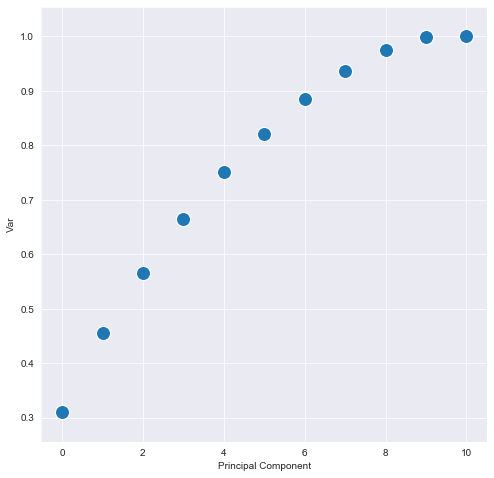

In [249]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=cum_sum,x=cum_sum.index,y='Var',palette='rainbow',s=200)
ax.set_xlabel('Principal Component');

In [250]:
ind = cum_sum.loc[cum_sum['Var']>0.95].index[0]
ind

8

In [251]:
x.shape
df_pca = pd.DataFrame(x[:,:ind+1],columns=['PC'+str(i+1) for i in range(ind+1)])
df_pca = pd.concat([df_pca,df['quality']],axis=1)

In [252]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,quality
0,4.022851,-0.814198,0.968741,-0.520472,-0.638449,-1.766763,-0.441616,0.713465,0.176821,4
1,-0.370754,0.683426,0.161583,1.482483,-0.123381,0.055473,0.879205,-0.031152,-1.029990,4
2,0.413473,-1.210828,0.046218,0.950003,-0.249450,-0.274776,0.771973,-0.850655,0.526686,4
3,1.917114,-0.022203,0.116452,-0.132848,-0.840365,0.935638,0.049623,-0.445023,0.420044,4
4,0.347379,1.132701,1.383838,0.507788,-0.348493,-0.234644,-0.780023,0.071120,-0.510877,4
5,-0.427388,-1.505188,-0.843624,0.480998,-0.063219,0.443897,0.572160,-1.047257,0.137184,4
6,-2.408116,-2.629973,-0.258553,0.821696,1.068264,-0.386253,-0.404574,0.251035,0.120638,3
7,-0.052646,-2.117045,-0.586155,1.227385,0.361748,-0.764187,-0.230753,-1.108487,-0.589040,3
8,-1.552722,-1.332542,-1.397709,1.679785,0.519002,-0.397065,-0.627877,-0.261654,0.050668,3
9,-1.273865,1.268573,-2.368195,-0.619486,-0.223943,0.671457,0.922563,-0.828029,1.149680,5


In [253]:
df_pca['quality'].value_counts()*100/df_pca.shape[0]

4    45.948915
3    29.030486
5    18.181818
6     3.350728
2     3.103543
1     0.247185
7     0.137325
Name: quality, dtype: float64

So let's define some levels of quality as `good` and some as `bad`.

In [254]:
df_pca.loc[df_pca['quality']<4].shape[0]

1179

In [255]:
df_pca.loc[df_pca['quality']>=4].shape[0]

2462

In [256]:
df_pca.loc[df_pca['quality']>=4].shape[0]/df_pca.loc[df_pca['quality']<4].shape[0]

2.0882103477523324

In [257]:
print("Bad quality: {}".format(df_pca.loc[df_pca['quality']<4].shape[0]/df_pca.shape[0]))
print("Good quality: {}".format(df_pca.loc[df_pca['quality']>=4].shape[0]/df_pca.shape[0]))

Bad quality: 0.3238121395221093
Good quality: 0.6761878604778907


Good, now we have a better proportion of the data!

In [258]:
df_pca['quality'].replace({1:1,2:1,3:1,4:2,5:2,6:2,7:2},inplace=True)

In [259]:
df_pca['quality'].value_counts()

2    2462
1    1179
Name: quality, dtype: int64

In [260]:
df_pca.rename(columns={'quality':'target'},inplace=True)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,target
0,4.022851,-0.814198,0.968741,-0.520472,-0.638449,-1.766763,-0.441616,0.713465,0.176821,2
1,-0.370754,0.683426,0.161583,1.482483,-0.123381,0.055473,0.879205,-0.031152,-1.029990,2
2,0.413473,-1.210828,0.046218,0.950003,-0.249450,-0.274776,0.771973,-0.850655,0.526686,2
3,1.917114,-0.022203,0.116452,-0.132848,-0.840365,0.935638,0.049623,-0.445023,0.420044,2
4,0.347379,1.132701,1.383838,0.507788,-0.348493,-0.234644,-0.780023,0.071120,-0.510877,2


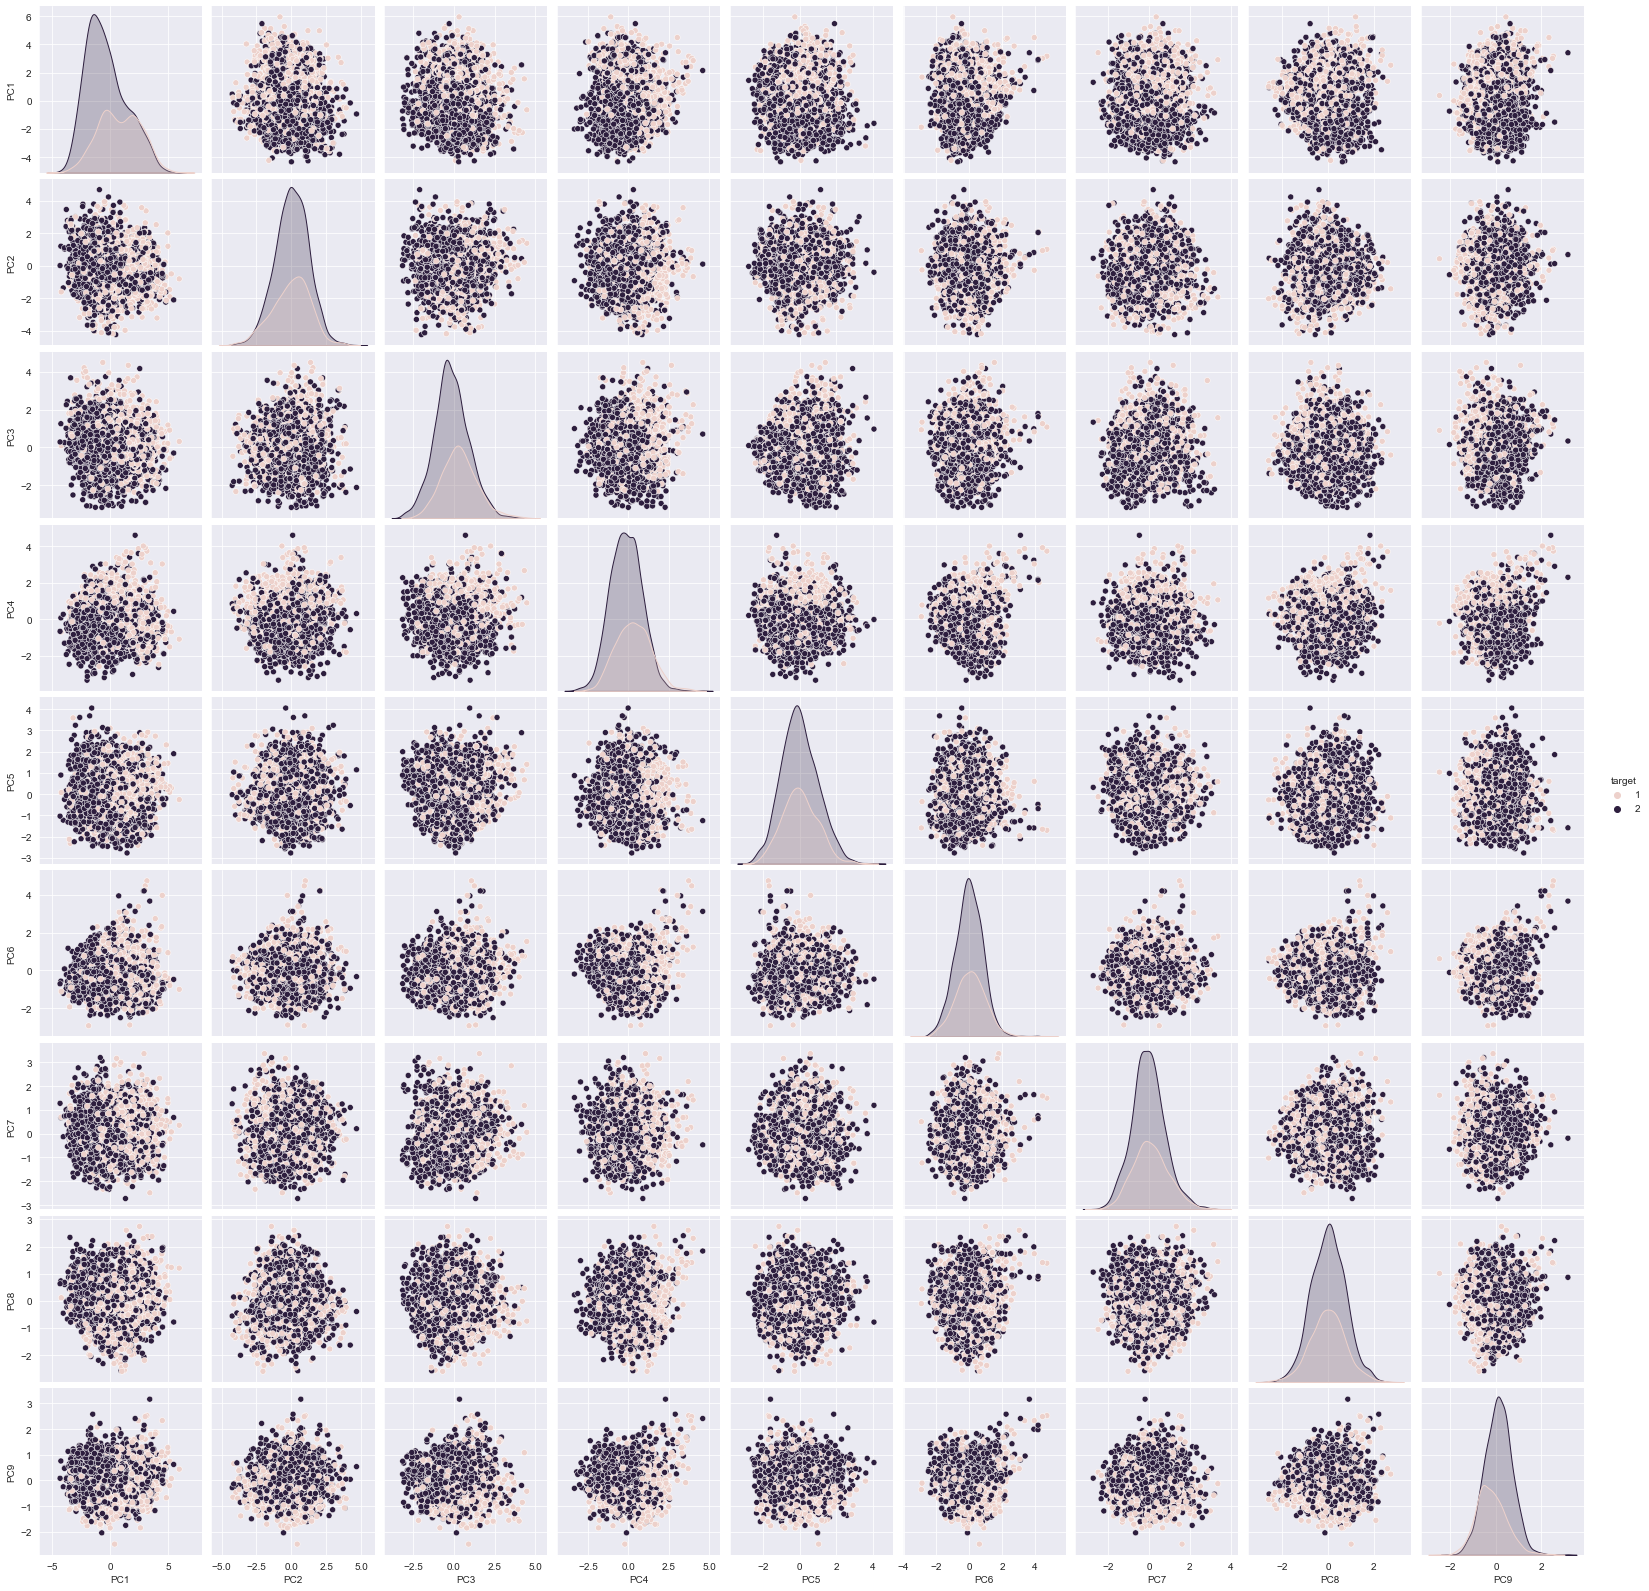

In [261]:
sns.pairplot(data=df_pca,hue='target')

 Finally the data is cleaned, let's save it.

In [197]:
df_pca.to_csv(path+'data/cleaned/wine.csv', index=False)